In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv('cereal.csv')
data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [3]:
data.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [4]:
data.shape

(77, 16)

In [5]:
data.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [6]:
data.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [8]:
#Fully write out the manufacturers names in order to fully understand the dataset
manufacturers_name = {'A': 'American Home Food Products',
    'G': 'General Mills',
    'K': 'Kelloggs',
    'N': 'Nabisco',
    'P': 'Post',
    'Q': 'Quaker Oats',
    'R': 'Ralston Purina'

}

data['mfr'] = data['mfr'].map(manufacturers_name)

In [9]:
data.name.unique()

array(['100% Bran', '100% Natural Bran', 'All-Bran',
       'All-Bran with Extra Fiber', 'Almond Delight',
       'Apple Cinnamon Cheerios', 'Apple Jacks', 'Basic 4', 'Bran Chex',
       'Bran Flakes', "Cap'n'Crunch", 'Cheerios', 'Cinnamon Toast Crunch',
       'Clusters', 'Cocoa Puffs', 'Corn Chex', 'Corn Flakes', 'Corn Pops',
       'Count Chocula', "Cracklin' Oat Bran", 'Cream of Wheat (Quick)',
       'Crispix', 'Crispy Wheat & Raisins', 'Double Chex', 'Froot Loops',
       'Frosted Flakes', 'Frosted Mini-Wheats',
       'Fruit & Fibre Dates; Walnuts; and Oats', 'Fruitful Bran',
       'Fruity Pebbles', 'Golden Crisp', 'Golden Grahams',
       'Grape Nuts Flakes', 'Grape-Nuts', 'Great Grains Pecan',
       'Honey Graham Ohs', 'Honey Nut Cheerios', 'Honey-comb',
       'Just Right Crunchy  Nuggets', 'Just Right Fruit & Nut', 'Kix',
       'Life', 'Lucky Charms', 'Maypo',
       'Muesli Raisins; Dates; & Almonds',
       'Muesli Raisins; Peaches; & Pecans', 'Mueslix Crispy Blend',
  

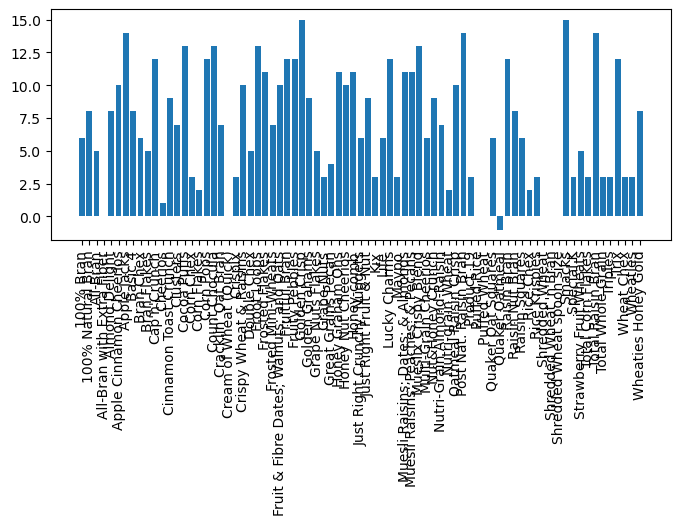

In [10]:
fig = plt.figure(figsize=(8,3))
plt.bar(x=data.name, height=data.sugars)
plt.xticks(rotation = 90)
plt.show()

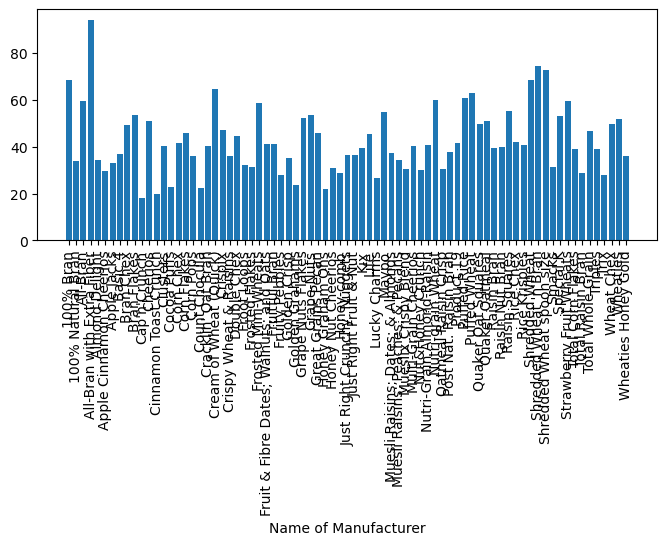

In [11]:
fig = plt.figure(figsize=(8,3))
plt.bar(x= data.name, height=data.rating)
plt.xlabel('Name of Manufacturer')
plt.ylabel = ('Rating')
plt.xticks(rotation =90)
plt.show()

In [12]:
#the highest rated cereal is? 
sort_highest = data.groupby(['name'])['rating'].max()
sort_highest

name
100% Bran                    68.402973
100% Natural Bran            33.983679
All-Bran                     59.425505
All-Bran with Extra Fiber    93.704912
Almond Delight               34.384843
                               ...    
Triples                      39.106174
Trix                         27.753301
Wheat Chex                   49.787445
Wheaties                     51.592193
Wheaties Honey Gold          36.187559
Name: rating, Length: 77, dtype: float64

In [13]:
highest_rated_brand = sort_highest.idxmax()
highest_rating = sort_highest.max()
print(f"The highest rated brand is '{highest_rated_brand}' with a rating of '{highest_rating}'")


The highest rated brand is 'All-Bran with Extra Fiber' with a rating of '93.704912'


In [14]:
rating_by_type= data.groupby(['type'])['rating'].sum()

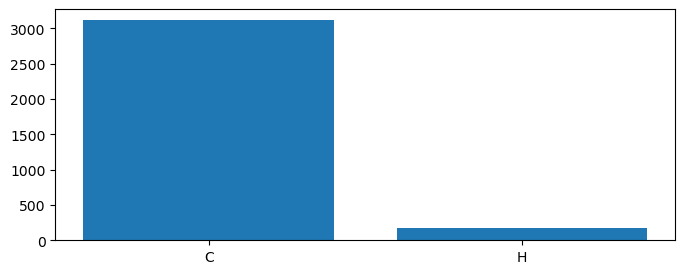

In [15]:
#Visualize this result we got above
fig = plt.figure(figsize=(8,3))
plt.bar(rating_by_type.index, rating_by_type.values)
plt.show()

compare the rating of sugar, type to manufacturers
what makes people rate a particular cereals? 
convert the manufactyre column into numeric/categorical data. You can use it to see the best brands 
figure out what makes people like a brand. 

In [16]:
#Manufacturer with the highest cereal product 
count = data.groupby(['mfr'])['name'].count()
count

mfr
American Home Food Products     1
General Mills                  22
Kelloggs                       23
Nabisco                         6
Post                            9
Quaker Oats                     8
Ralston Purina                  8
Name: name, dtype: int64

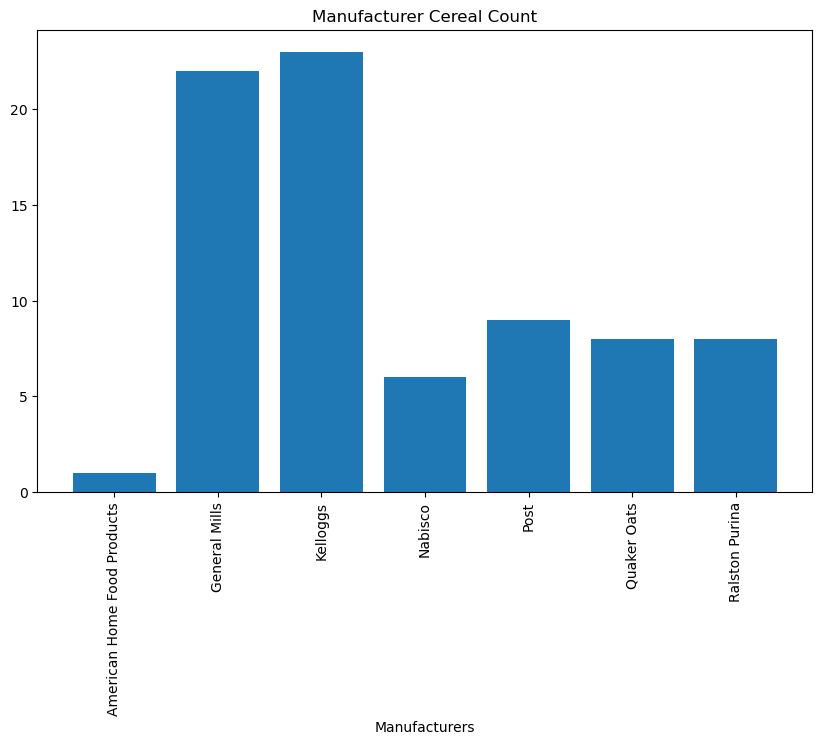

In [17]:
#Visualize this result we got above
fig = plt.figure(figsize=(10,6))
plt.bar(x=count.index, height=count.values)
plt.xlabel('Manufacturers')
plt.title('Manufacturer Cereal Count')
plt.xticks(rotation = 90)
plt.show()

In [18]:
sort = data.groupby(['type'])['name'].count()
sort

type
C    74
H     3
Name: name, dtype: int64

In [19]:
data.head(-5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Special K,Kelloggs,C,110,6,0,230,1.0,16.0,3,55,25,1,1.0,1.00,53.131324
68,Strawberry Fruit Wheats,Nabisco,C,90,2,0,15,3.0,15.0,5,90,25,2,1.0,1.00,59.363993
69,Total Corn Flakes,General Mills,C,110,2,1,200,0.0,21.0,3,35,100,3,1.0,1.00,38.839746
70,Total Raisin Bran,General Mills,C,140,3,1,190,4.0,15.0,14,230,100,3,1.5,1.00,28.592785


In [20]:
sugar_level_in_cereal = data.groupby(['name'])['sugars'].sum() #determine the product with the highest sugar level
print(f"The cereal product with the highest sugar level is {sugar_level_in_cereal.idxmax()} with {sugar_level_in_cereal.max()} sugar per gram")

The cereal product with the highest sugar level is Golden Crisp with 15 sugar per gram


In [21]:
sugar_level_in_cereal = data.groupby(['name'])['sugars'].sum() #determine the product with the lowest sugar level
print(f"The cereal product with the lowest sugar level is {sugar_level_in_cereal.idxmin()} with {sugar_level_in_cereal.min()} sugar per gram")

The cereal product with the lowest sugar level is Quaker Oatmeal with -1 sugar per gram


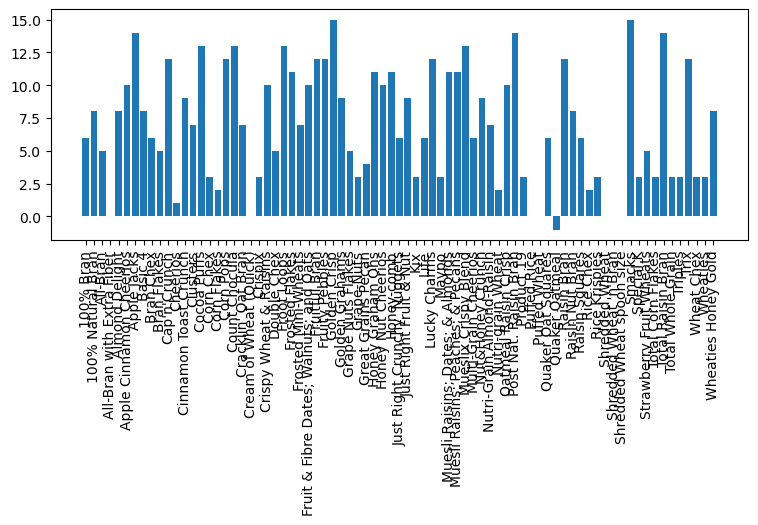

In [22]:
#Visualize this result we got above
fig = plt.figure(figsize=(9,3))
plt.bar(sugar_level_in_cereal.index, sugar_level_in_cereal.values)
plt.xticks(rotation = 90)
plt.show()

In [23]:
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [24]:
#Check the calories distribution 
calories = data.groupby(['mfr'])['calories'].count()
calories

mfr
American Home Food Products     1
General Mills                  22
Kelloggs                       23
Nabisco                         6
Post                            9
Quaker Oats                     8
Ralston Purina                  8
Name: calories, dtype: int64

Text(0.5, 1.0, 'Distribution of the calories')

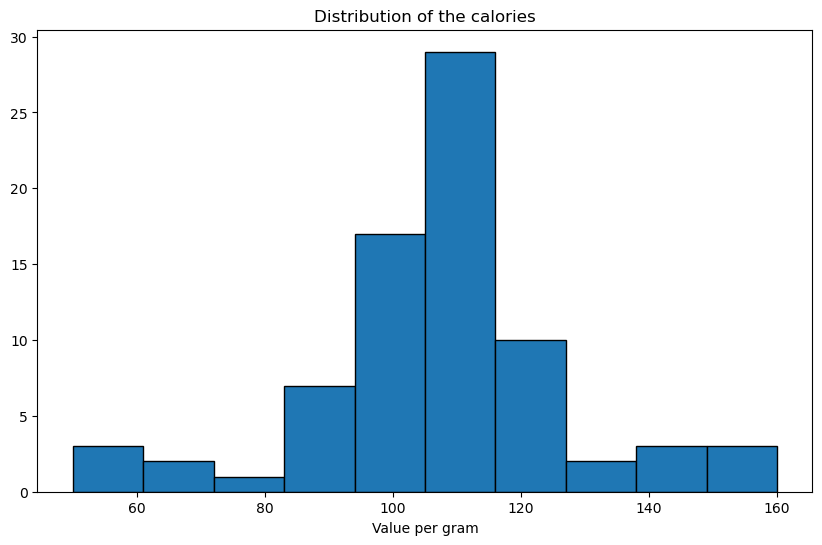

In [25]:
calories = data['calories']
fig = plt.figure(figsize=(10,6))
plt.hist(calories, bins =10, edgecolor='black')
plt.xlabel('Value per gram')
#plt.ylabel('Frequency')
plt.title('Distribution of the calories')

Text(0.5, 1.0, 'Distribution of the vitamins')

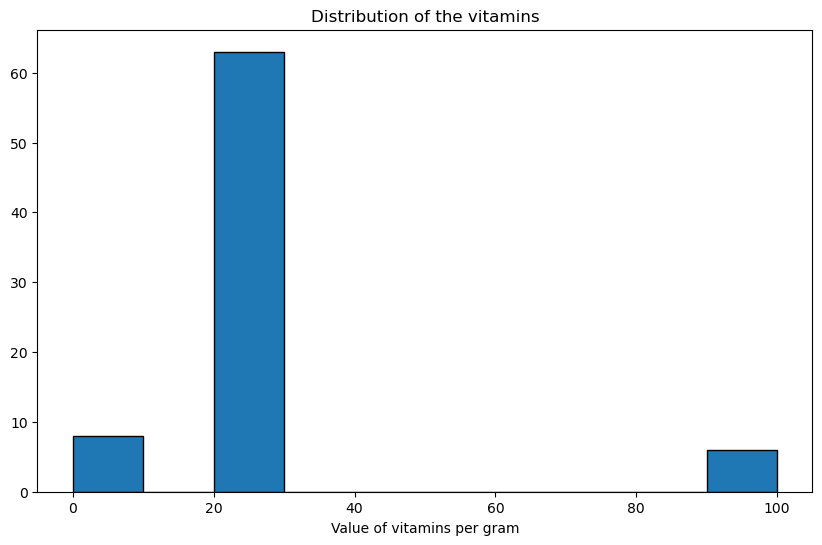

In [26]:
#Distribution o Vitamins
stat_vit = data['vitamins'].describe()
vitamins = data['vitamins']
fig = plt.figure(figsize=(10,6))
plt.hist(vitamins,  bins =10, edgecolor='black')
plt.xlabel('Value of vitamins per gram')
#plt.ylabel('Frequency')
plt.title('Distribution of the vitamins')

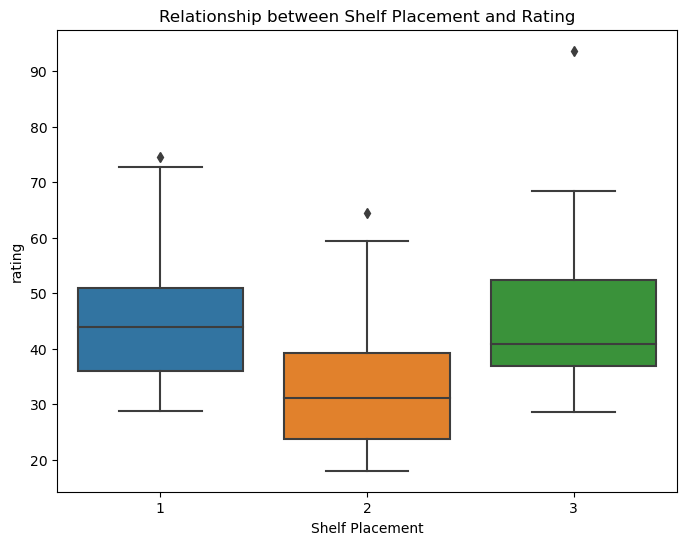

In [27]:
#Visualize the relationship between shelf placing and rating 
#rating_by_shelf_placing = data.groupby(['shelf'])['rating'].describe()

#Visualize
#fig = plt.figure(figsize=(10,3))
#sns.boxplot(rating_by_shelf_placing)
#plt.title('Relationship between shelf placing and rating')



# summary statistics of rating grouped by shelf placement
rating_stats = data.groupby(['shelf'])['rating'].describe()

# box plot of rating by shelf placement
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='shelf', y='rating')
plt.xlabel('Shelf Placement')
#plt.ylabel('Rating')
plt.title('Relationship between Shelf Placement and Rating')
plt.show()

In [28]:
sort_highest = data.groupby(['name'])['rating'].max() #This is estimating the highest rated. Maximum rated. Top. Probably the best quality. 
sort_highest.idxmax()

'All-Bran with Extra Fiber'

In [29]:
#the highest rated cereal is? 
sort_highest = data.groupby(['name'])['rating'].value_counts() #frequency the cereal that appear more often in the data. More people take 100% Bran and so rate it more frequently 
high = sort_highest.idxmax()
high

('100% Bran', 68.402973)

In [30]:
dat = data[data['name'] == '100% Bran'] #Not displayong anything? Something isn't right. I figured it out.  tampered with the original data 
dat
#Something must have made it to be the most rated. Maybe the placement on the shelf or cups or the vitamins and nutrient in it. Well, we dont know whether the ratings quality are good ones or bad tho. thats another thing to explore. 

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973


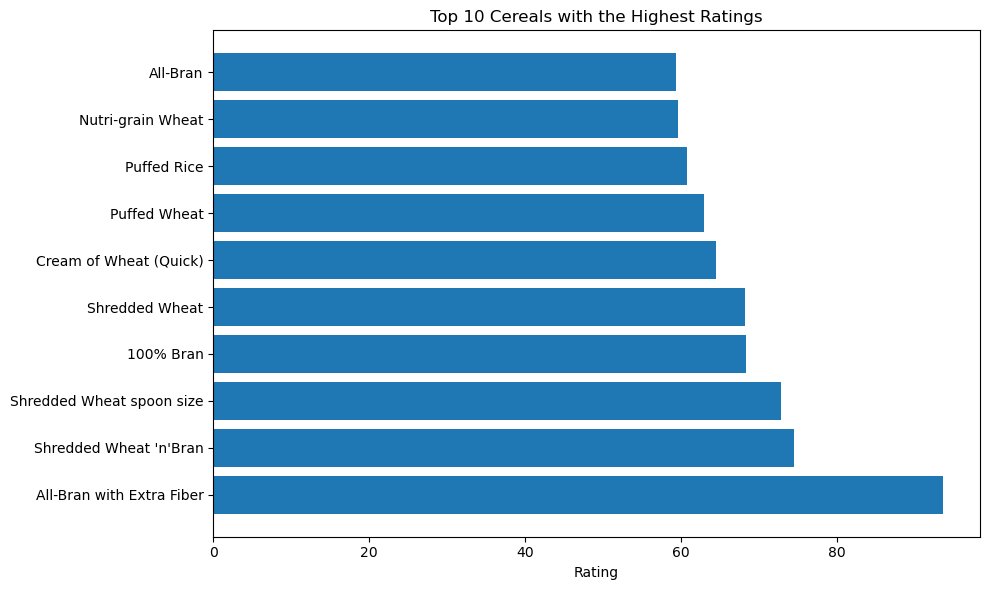

In [31]:
top_10_cereals = data.nlargest(10, 'rating')

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_cereals['name'], top_10_cereals['rating'])
plt.xlabel('Rating')
#plt.ylabel('Cereal')
plt.title('Top 10 Cereals with the Highest Ratings')
plt.tight_layout()
plt.show()

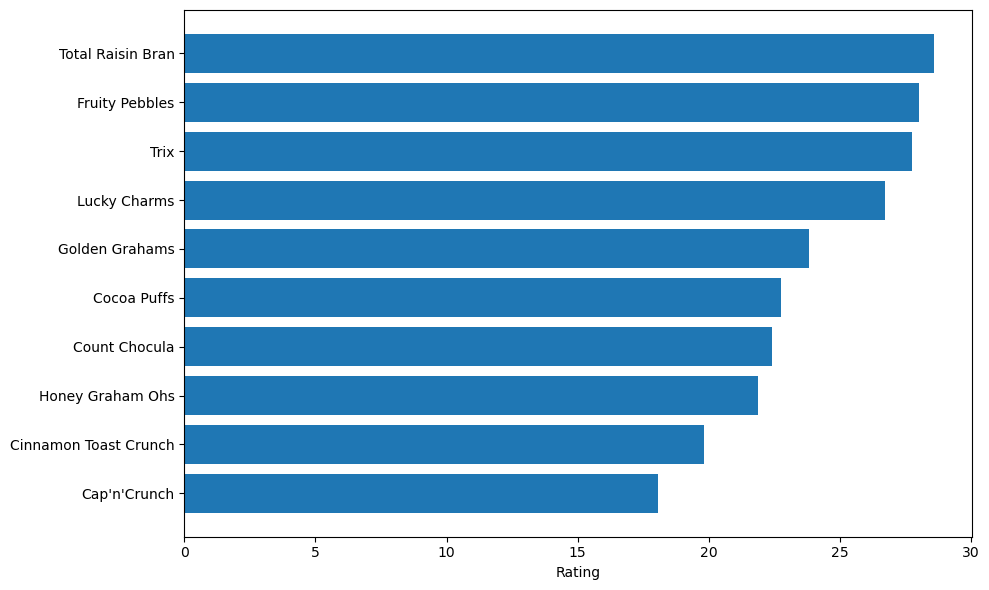

In [32]:
#Visualize the lowest 10 rated cereals 
lowest_rated = data.nsmallest(10, 'rating')

fig= plt.figure(figsize=(10,6))
plt.barh(lowest_rated['name'], lowest_rated['rating'])
plt.xlabel('Rating')
#plt.ylabel('Name of Cereal')
plt.tight_layout()
plt.show()

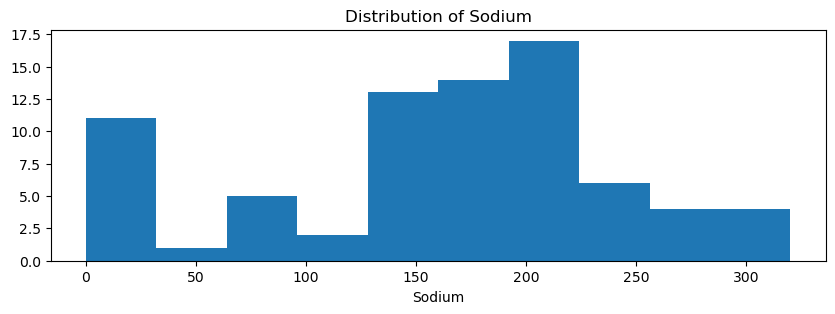

In [33]:
#Check the distribution of sodium 
fig= plt.figure(figsize=(10,3))
plt.hist(data['sodium'], bins= 10)
plt.xlabel('Sodium')
#plt.ylabel('Frequency')
plt.title('Distribution of Sodium')
plt.show()

In [34]:
#can i seee a pattern between why some products are low rated and some are highly rated? could it be becasue of the sugar and nutrient content in them or is it where they are placed? or maybe the fact that they are filling> I think i can explore that correlation using a scatter plot or heatmap 


In [35]:
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


Text(0.5, 1.0, 'Distribution of protein')

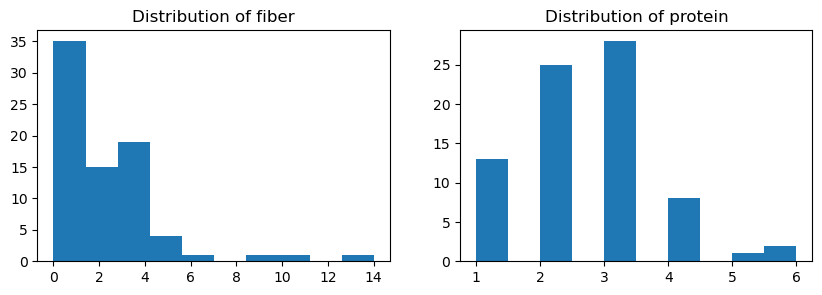

In [36]:
#Visualize the distribution of calories in the data set
fig, ax= plt.subplots(1, 2, figsize=(10,3))

ax[0].hist(data['fiber'], bins= 10)
ax[0].set_title('Distribution of fiber')


ax[1].hist(data['protein'], bins= 10)
ax[1].set_title('Distribution of protein')

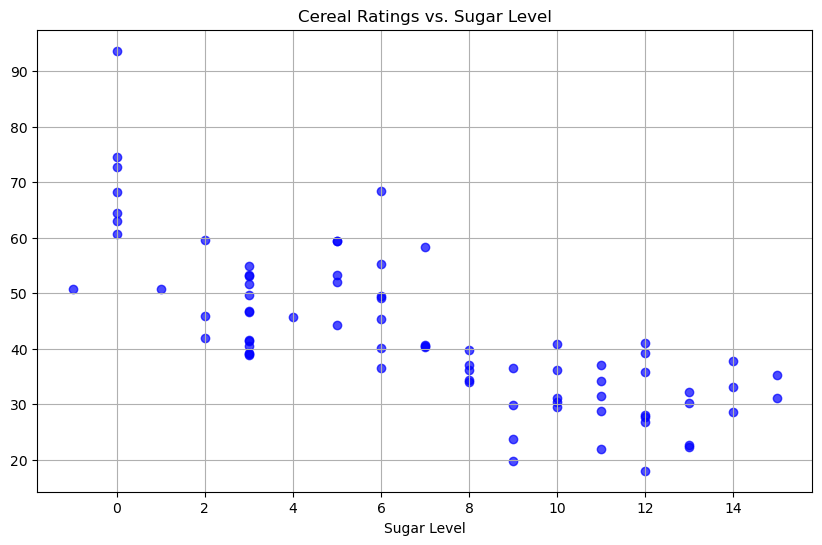

In [38]:
# Create a scatter plot to visualize how the sugar level in each cereal product determines the rating. is sugar a strong variable that contributes to rating 
plt.figure(figsize=(10, 6))
plt.scatter(data['sugars'], data['rating'], color='blue', alpha=0.7)
plt.title('Cereal Ratings vs. Sugar Level')
plt.xlabel('Sugar Level')
#plt.ylabel('Rating')
plt.grid(True)
plt.show()


From the plot above, we observe that products with zero sugars have a very high rating compare to high sugars products with low ratings

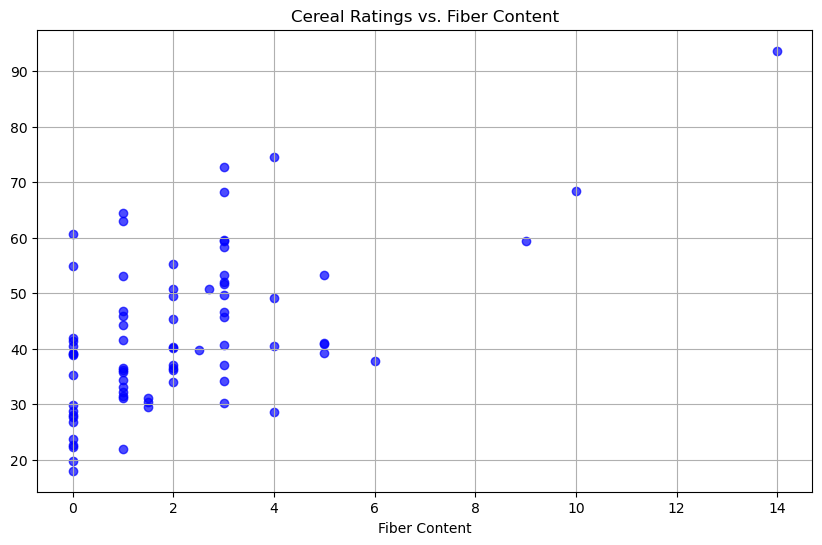

In [39]:
#Visualize for fibres too
# Create a scatter plot to visualize how the sugar level in each cereal product determines the rating. is sugar a strong variable that contributes to rating 
plt.figure(figsize=(10, 6))
plt.scatter(data['fiber'], data['rating'], color='blue', alpha=0.7)
plt.title('Cereal Ratings vs. Fiber Content')
plt.xlabel('Fiber Content')
#plt.ylabel('Rating')
plt.grid(True)
plt.show()


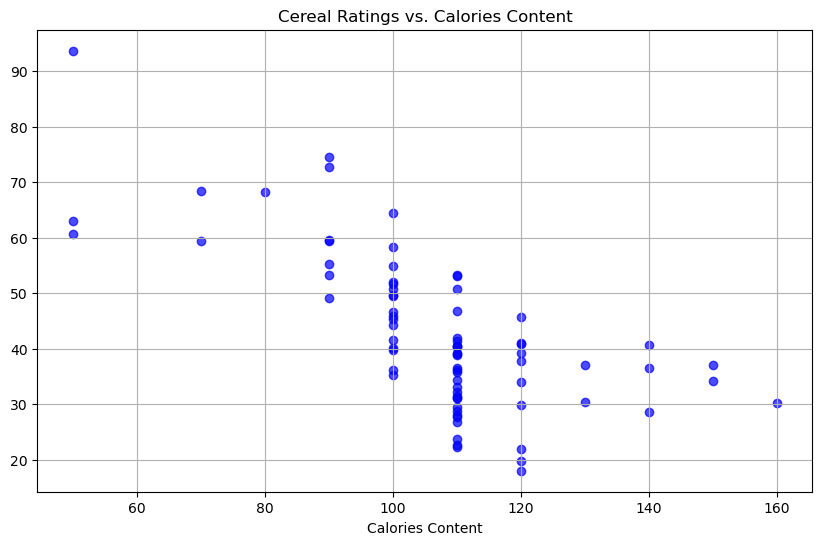

In [43]:
fig= plt.figure(figsize=(10, 6))
plt.scatter(data['calories'], data['rating'], color='blue', alpha=0.7)
plt.title('Cereal Ratings vs. Calories Content')
plt.xlabel('Calories Content')
#plt.ylabel('Rating')
plt.grid(True)
plt.show()

Lower calories products are favoured over high calories content 

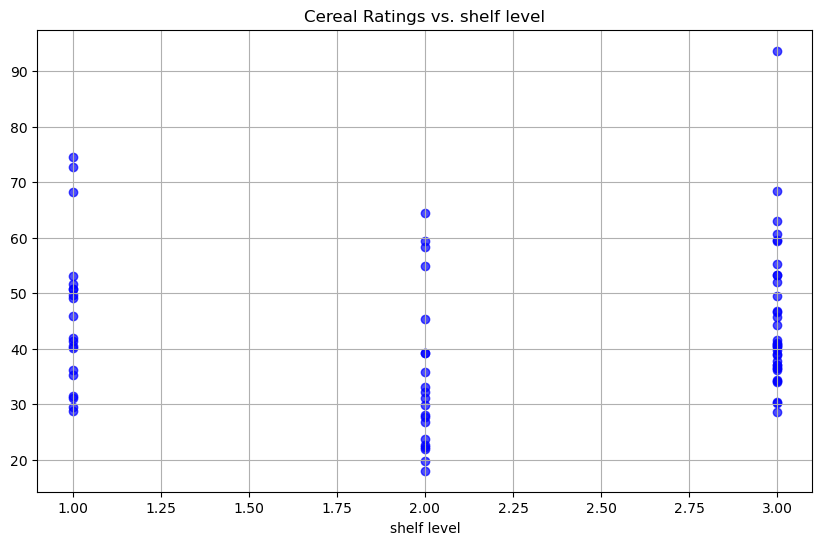

In [40]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(data['shelf'], data['rating'], color='blue', alpha=0.7)
plt.title('Cereal Ratings vs. shelf level')
plt.xlabel('shelf level')
#plt.ylabel('Rating')
plt.grid(True)
plt.show()

Shelf is not really a determinant of rating. 

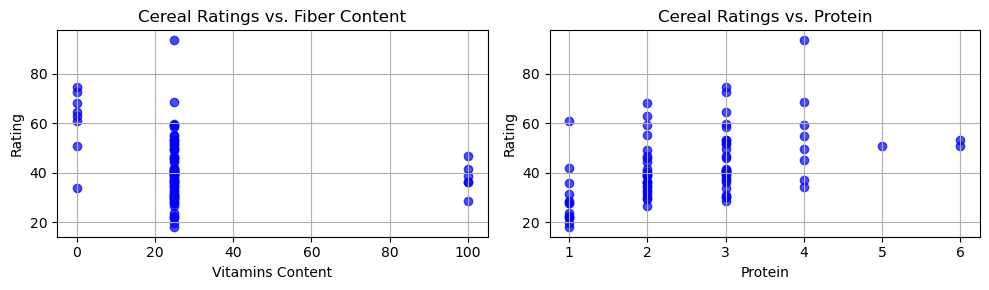

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10,3))


# Create a scatter plot for Fiber vs. Rating
axes[0].scatter(data['vitamins'], data['rating'], color='blue', alpha=0.7)
axes[0].set_title('Cereal Ratings vs. Fiber Content')
axes[0].set_xlabel('Vitamins Content')
axes[0].set_ylabel('Rating')
axes[0].grid(True)

# Create a scatter plot for Fiber vs. Rating
axes[1].scatter(data['protein'], data['rating'], color='blue', alpha=0.7)
axes[1].set_title('Cereal Ratings vs. Protein')
axes[1].set_xlabel('Protein')
axes[1].set_ylabel('Rating')
axes[1].grid(True)


# Additional space adjustment
plt.tight_layout()
plt.show()


In [ ]:
correlation_matrix = data.corr()
correlation_matrix

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


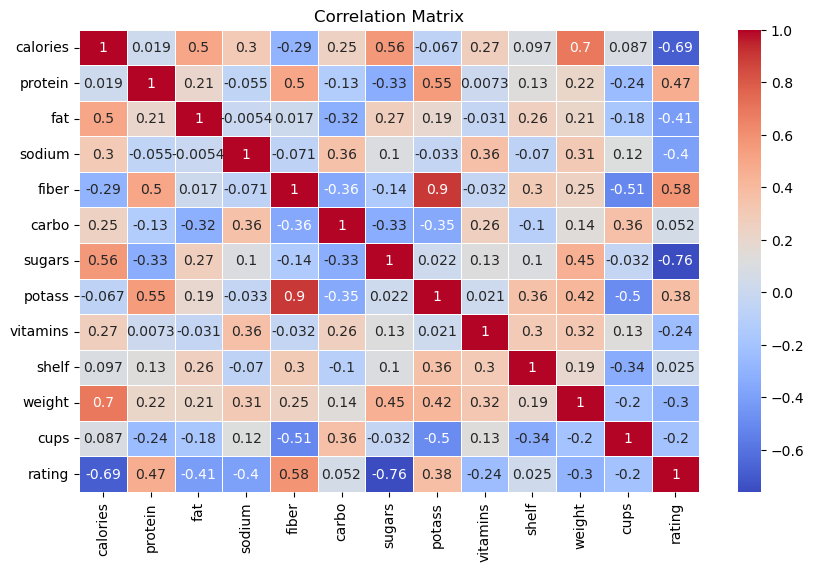

In [ ]:
fig = plt.figure(figsize= (10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


<Figure size 1200x600 with 0 Axes>

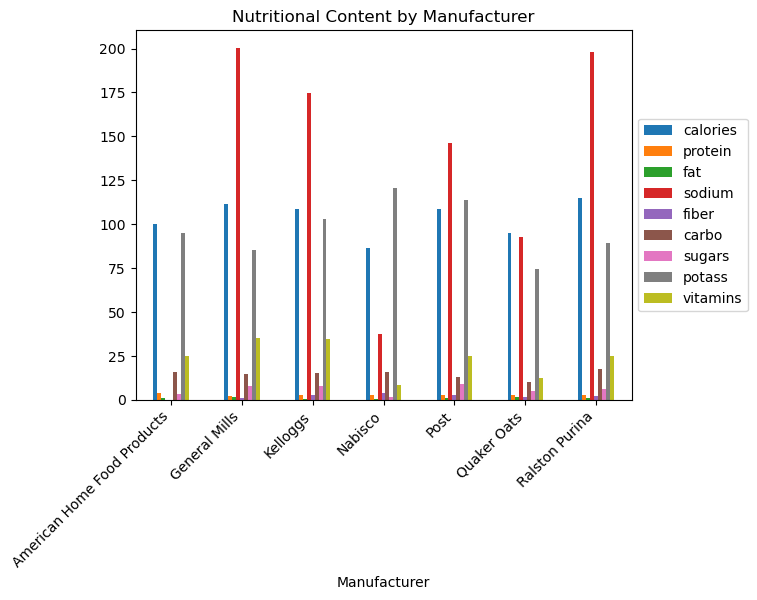

In [ ]:
# Grouped bar plot: Nutritional content by Manufacturer
nutritional_factors = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'potassium']
manufacturer_labels = ['American Home Food Products', 'General Mills', 'Kelloggs', 'Nabisco', 'Post', 'Quaker Oats', 'Ralston Purina']

# Calculate the mean values for each nutritional factor and manufacturer
mean_values = data.groupby('mfr')[nutritional_factors].mean()

# Create the grouped bar plot
plt.figure(figsize=(12, 6))
ax = mean_values.plot(kind='bar')
plt.xlabel('Manufacturer')
#plt.ylabel('Mean Value')
plt.title('Nutritional Content by Manufacturer')
ax.legend(nutritional_factors, loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend to the right
plt.xticks(range(len(manufacturer_labels)), manufacturer_labels, rotation='horizontal')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Select the relevant columns for nutrition features
nutrition_cols = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass']

# Create a new DataFrame with only the nutrition columns
nutrition_data = data[nutrition_cols]

# Group the data by manufacturer and calculate the mean values for each nutrition feature
mean_nutrition = nutrition_data.groupby(data['mfr']).mean()

# Reset the index to have 'mfr' as a column
mean_nutrition.reset_index(inplace=True)


In [ ]:
mean_nutrition

,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass
0,American Home Food Products,100.000000,4.000000,1.000000,0.000000,0.000000,16.000000,3.000000,95.000000
1,General Mills,111.363636,2.318182,1.363636,200.454545,1.272727,14.727273,7.954545,85.227273
2,Kelloggs,108.695652,2.652174,0.608696,174.782609,2.739130,15.130435,7.565217,103.043478
3,Nabisco,86.666667,2.833333,0.166667,37.500000,4.000000,16.000000,1.833333,120.666667
4,Post,108.888889,2.444444,0.888889,146.111111,2.777778,13.222222,8.777778,113.888889
5,Quaker Oats,95.000000,2.625000,1.750000,92.500000,1.337500,10.000000,5.250000,74.375000
6,Ralston Purina,115.000000,2.500000,1.250000,198.125000,1.875000,17.625000,6.125000,89.250000


In [ ]:
# Melt the DataFrame to convert it into a long format
melted_nutrition = pd.melt(mean_nutrition, id_vars='mfr', var_name='nutrition', value_name='mean_value')
melted_nutrition

,mfr,nutrition,mean_value
0,American Home Food Products,calories,100.000000
1,General Mills,calories,111.363636
2,Kelloggs,calories,108.695652
3,Nabisco,calories,86.666667
4,Post,calories,108.888889
5,Quaker Oats,calories,95.000000
6,Ralston Purina,calories,115.000000
7,American Home Food Products,protein,4.000000
8,General Mills,protein,2.318182
9,Kelloggs,protein,2.652174


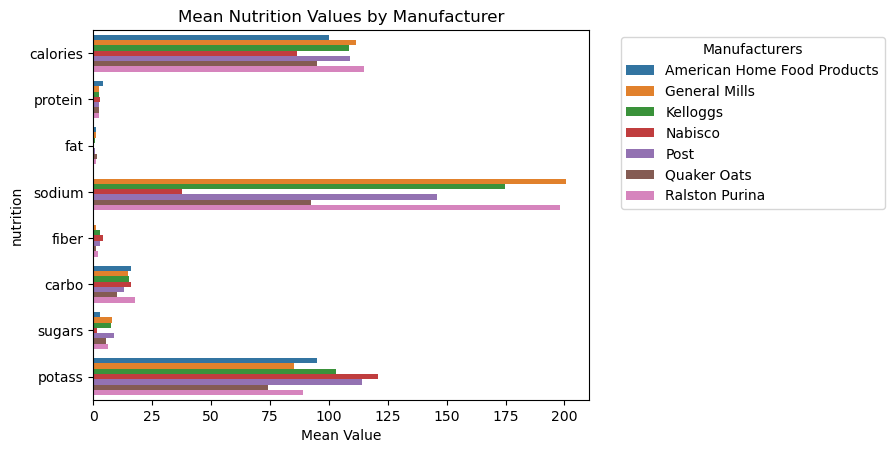

In [ ]:
# Melt the DataFrame to convert it into a long format
melted_nutrition = pd.melt(mean_nutrition, id_vars='mfr', var_name='nutrition', value_name='mean_value')

# Create the bar plot using seaborn
sns.barplot(x='mean_value', y='nutrition', hue='mfr', data=melted_nutrition)

# Set the plot title and labels
plt.title('Mean Nutrition Values by Manufacturer')
plt.xlabel('Mean Value')
#plt.ylabel('Nutrition Features')

# Move the legend to the side and set the title
plt.legend(title='Manufacturers', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

In [ ]:
#Calculate and visualize the highest rated cereal manufacturers
#Manufacturer with the highest ratings
highest_rating = data.groupby(['mfr'])['rating'].max().reset_index()
highest_rating = highest_rating.sort_values(ascending = False, )

,mfr,rating
0,American Home Food Products,54.850917
1,General Mills,51.592193
2,Kelloggs,93.704912
3,Nabisco,74.472949
4,Post,53.371007
5,Quaker Oats,63.005645
6,Ralston Purina,49.787445


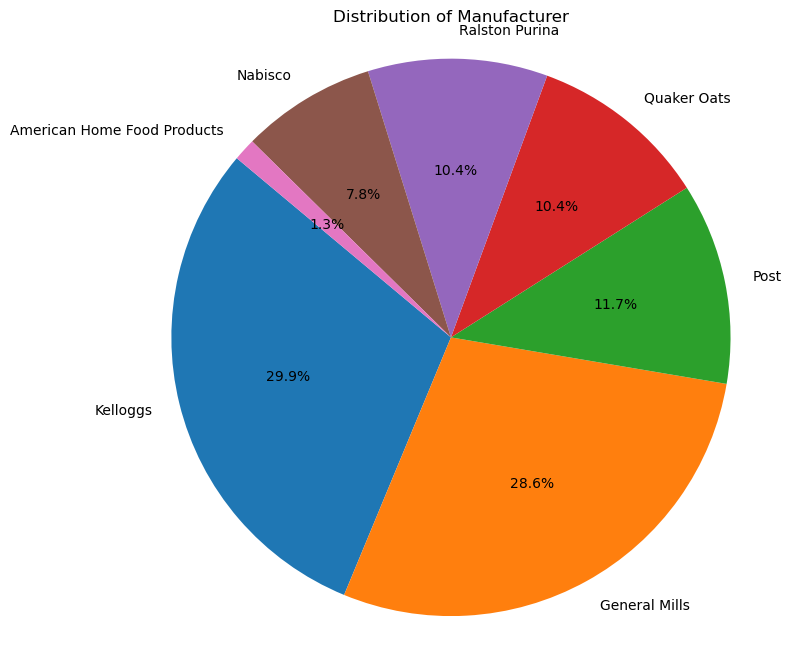

In [42]:
#Visualize the distribution of the manufacturers  in a piechart
# Count the occurrences of each value in the 'mfr' column
mfr_counts = data['mfr'].value_counts()

# Create a pie plot
plt.figure(figsize=(8, 8))
plt.pie(mfr_counts, labels=mfr_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Manufacturer')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

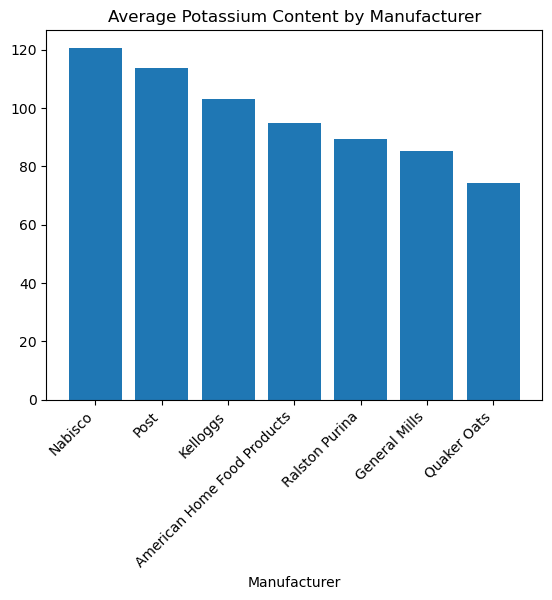

In [ ]:
# Calculate the average potassium for each manufacturer
avg_potassium = data.groupby('mfr')['potass'].mean().reset_index()

# Sort the data by potassium in descending order
avg_potassium = avg_potassium.sort_values('potass', ascending=False)

# Plot the average potassium values
plt.bar(avg_potassium['mfr'], avg_potassium['potass'])

# Add labels and title
plt.xlabel('Manufacturer')
#plt.ylabel('Average Potassium')
plt.title('Average Potassium Content by Manufacturer')
plt.xticks(rotation=45, ha='right')

# Annotate the highest potassium value if available
nabisco_potassium = avg_potassium.loc[avg_potassium['mfr'] == 'N', 'potass']
if not nabisco_potassium.empty:
    nabisco_potassium = nabisco_potassium.values[0]
    plt.annotate('Nabisco', (2, nabisco_potassium), xytext=(2.5, nabisco_potassium + 50),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

# Display the plot
plt.show()